# Deep Learning - Object herkenning

### Van: Mart Veldkamp

# Inhoudsopgave

1. [Inleiding](#1)
2. [Het probleem](#2)
3. [Library's laden + data ophalen](#ophalen)
    - [Versie's van de verschillende library's](#versie)
4. [Data visualiseren](#visualiseren)
5. [Model laden](#3)
6. [Classificeer foto's met ResNet50](#4)
7. [Conclusie](#5)
8. [Bronnen](#6)

# 1. Inleiding <a class='anchor' id='1'></a>

Deze opdracht is onderdeel van het overkoepelende vak Deep Learning, dit is één van de meerdere opgaves die ik gebruik in dit vak om te laten zien hoe deep learning gebruikt kan worden voor verschillende doeleinde. Al deze opgaves zijn daarom ook op de lossen door middel van Deep Learning.

Alle code in deze opdrachten zijn van mijzelf, gebasseerd op code uit de lessen, of waar ik zelf vast liep gebaseerd op code snippets van het internet. Mocht het toch voorkomen dat er code 1 op 1 is overgenomen, dan staat dit vermeld in de bronnen

# 2. Het probleem <a class='anchor' id='2'></a>

Het probleem dat ik in deze notebook ga behandelen is het bepalen of hoe goed verschillende aanpassingen op een foto invloed hebben op het uiteindelijke resultaat. Denk aan: een afbeeldingen croppen, resizen of inzoomen. Hoe we dit gaan testen is aan de hand van die verschillende aanpassingen kijken wat het model denkt dat het voor dier is. We gaan hiervan een paar afbeeldingen van een Jack Russel gebruiken, aangezien ik zelf dat soort hond had en dacht dat het wel een leuk idee was.

# 3. Library's laden + data ophalen <a class='anchor' id='ophalen'></a>

Deze dataset is afkomstig van DLO

In [1]:
import numpy as np
import cv2
import keras

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.datasets import load_sample_image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

## Versie's van de verschillende library's <a class='anchor' id='versie'></a>

In [2]:
print("Versie van Keras:", keras.__version__)
print("Versie van Numpy:", np.__version__)
print("Versie van matplotlibrary:",matplotlib. __version__)
print("Versie van opencv:",cv2.__version__)
print("Versie van Tensorflow:",tf.__version__)

Versie van Keras: 2.6.0
Versie van Numpy: 1.19.5
Versie van matplotlibrary: 3.2.0
Versie van opencv: 4.5.3
Versie van Tensorflow: 2.6.0


# 4. Data visualiseren <a class='anchor' id='visualiseren'></a>

In [ ]:
# Ik heb afbeeldingeen van verschillende jack russel honden gevonden en toegevoegd, maar in plaats van deze te resizen heb
# ik ze geprobeerd te croppen.
jack1 = imread("jack_russel_fotos/jack_russel1.jpg")
jack2 = imread("jack_russel_fotos/jack_russel2.jpg")
jack3 = imread("jack_russel_fotos/jack_russel3.jpg")
 
print(jack1.shape)
images2 = np.array([jack1, jack2, jack3])

(244, 224, 3)


(3, 244, 224, 3)


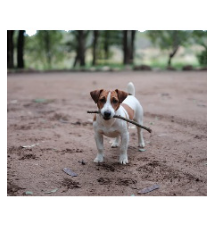

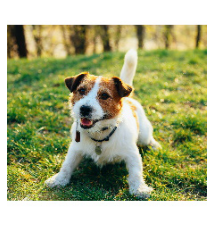

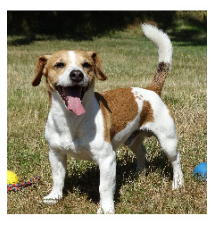

In [ ]:
batch_size, height, width, channels = images2.shape
print(images2.shape)

plt.imshow(images2[0, :, :, :])
plt.axis("off") 
plt.show()

plt.imshow(images2[1, :, :, :]) 
plt.axis("off") 
plt.show()

plt.imshow(images2[2, :, :, :]) 
plt.axis("off") 
plt.show()

Ik heb ervoor gekozen om deze 3 foto's te laten testen door het model, hoewel ik niet zeker weet of het model weet wat een jack russel is. Wou ik wel kijken of het deze foto's herkent als een honden soort. Aangezien alle 3 de fotos wel een redelijk normale foto achtergrond / kleur hebben ga ik er niet vanuit dat het erg verkeerd zal raden.

# 5. Model laden <a class='anchor' id='3'></a>

Het model wat ik ga gebruiken is genaamd ResNet50

In [ ]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

# 6. Classificeer foto's met ResNet50 <a class='anchor' id='4'></a>

In [ ]:
images2_resized = tf.image.resize(images2, [224, 224])

In [ ]:
inputs = keras.applications.resnet50.preprocess_input(images2_resized)

Y_proba = model.predict(inputs, steps=1)

top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=5)

for image2_index in range(len(images2)):
    print("Image #{}".format(image2_index))
    for class_id, name, y_proba in top_K[image2_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

Image #0
  n02089973 - English_foxhound 45.14%
  n02089867 - Walker_hound 19.02%
  n02088364 - beagle       11.39%
  n02088632 - bluetick     6.61%
  n02091134 - whippet      4.50%

Image #1
  n02088364 - beagle       22.18%
  n02113186 - Cardigan     22.15%
  n02095314 - wire-haired_fox_terrier 9.03%
  n02087046 - toy_terrier  7.79%
  n04409515 - tennis_ball  7.56%

Image #2
  n02089973 - English_foxhound 56.41%
  n02088364 - beagle       19.80%
  n02089867 - Walker_hound 14.41%
  n02101388 - Brittany_spaniel 2.85%
  n02109525 - Saint_Bernard 1.23%



# 7. Conclusie <a class='anchor' id='5'></a>

De conlcusie die we hieruit kunnen trekken is dat het model niet zo goed 
tegen gekropte foto’s kan aangezien hij bij elke foto met geen hoge 
accuracy kan zeggen wat het nou is. Daarnaast kwam ik erachter dat de 
object “Jack Russel” helaas niet in de dataset zat. Dus dat de hoogste 
accuracy ging naar een ander soort hond, genaamd de inglish foxhound. 
Die er redelijk uitziet als een Jack Russel:

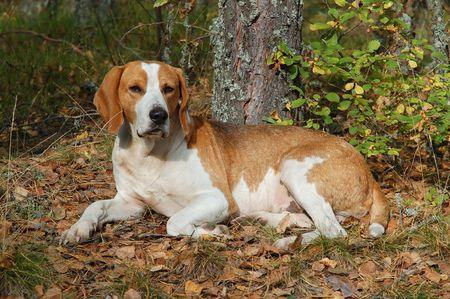

Je kan enigszins zien waarom ResNet50 dit denkt, aangezien hij dezelfde 
kleuren combinatie heeft. Alleen blijkbaar kijkt hij niet naar de grootte van 
een hond ten opzichte van de achtergrond. Aangezien dit soort honden 
een stuk groter zijn.

# 8. Bronnen: <a class='anchor' id='6'></a>

1. [keras model](https://keras.io/api/applications/)
2. [Wat is Object herkenning?](https://trendskout.com/solutions/image-recognition-en-beeldherkenning/)